Regressão Logistica

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


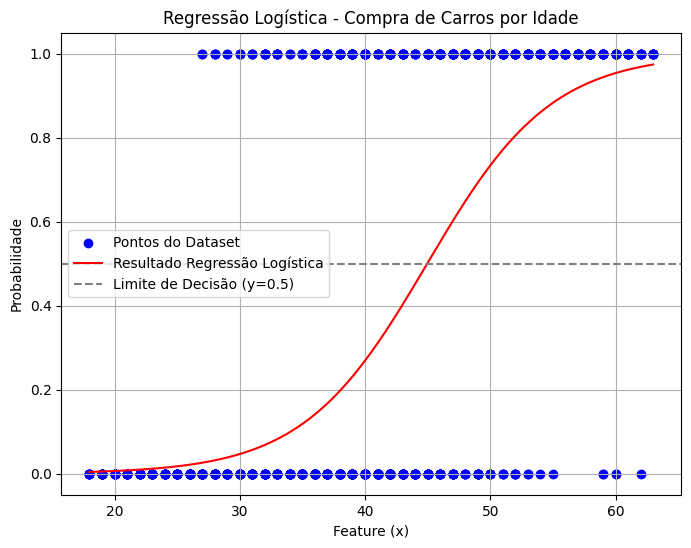

In [ ]:
#regressão logistica
import pandas as pd
pd = pd.read_csv('datasets/car_data.csv', encoding='latin1')
X_data = pd['Age']
y_data = pd['Purchased']

modelo_rl = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(1,))
])

modelo_rl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='binary_crossentropy', metrics=['accuracy'])
modelo_rl.fit(X_data, y_data, epochs=500, verbose=0)

X_plot = tf.linspace(min(X_data), max(X_data), len(X_data))
y_previstos_rl = modelo_rl.predict(X_plot)

plt.figure(figsize=(8, 6))
plt.scatter(X_data, y_data, color='blue', label='Pontos do Dataset')
plt.plot(X_plot, y_previstos_rl, color='red', label='Resultado Regressão Logística')
plt.axhline(0.5, color='gray', linestyle='--', label='Limite de Decisão (y=0.5)')
plt.title("Regressão Logística - Compra de Carros por Idade")
plt.xlabel("Feature (x)")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


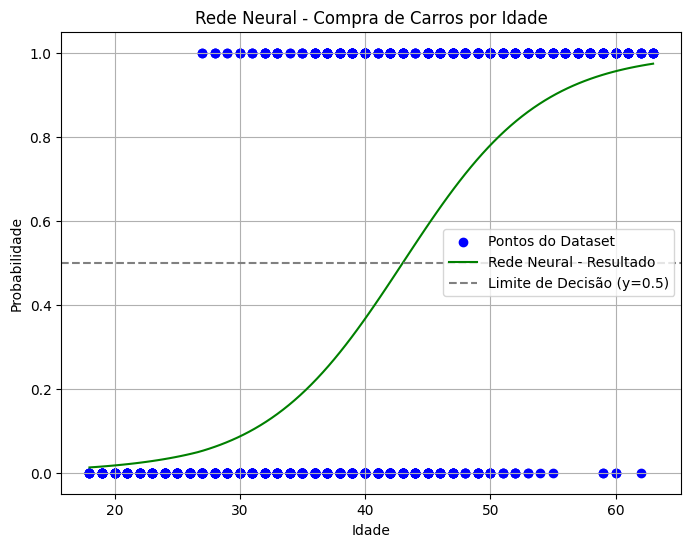

In [27]:
#rede neural
import pandas as pd
pd = pd.read_csv('car_data.csv', encoding='latin1')
X_data = pd['Age'].values.reshape(-1, 1)
y_data = pd['Purchased'].values.reshape(-1, 1)

modelo_rd = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo_rd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='binary_crossentropy', metrics=['accuracy'])
modelo_rd.fit(X_data, y_data, epochs=500, verbose=0)

X_plot = tf.linspace(min(X_data), max(X_data), 100)[:, None]
y_previstos_rd = modelo_rd.predict(X_plot)

X_plot = X_plot.numpy().flatten()
y_previstos_rd = y_previstos_rd.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(X_data, y_data, color='blue', label='Pontos do Dataset')
plt.plot(X_plot, y_previstos_rd, color='green', label='Rede Neural - Resultado')
plt.axhline(0.5, color='gray', linestyle='--', label='Limite de Decisão (y=0.5)')

plt.title("Rede Neural - Compra de Carros por Idade")
plt.xlabel("Idade")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(True)
plt.show()


Acurácia e FI-Score para Regressão Logistica

In [28]:
y_previstos_rl = modelo_rl.predict(X_data)
y_previstos_rl_binario = [1 if yp >= 0.5 else 0 for yp in y_previstos_rl]

def calcular_acuracia(y):
    acertos = sum(1 for yi, yp in zip(y, y_previstos_rl_binario) if yi == yp)
    return acertos / len(y)
acuracia = calcular_acuracia(y_data)
print(f'Acurácia: {acuracia * 100}%')

def calcular_fi_score(vp, fp, fn):
    precisao = vp / (vp + fp)
    recall = vp / (vp + fn)
    return 2 * (precisao * recall) / (precisao + recall)

quantidade_VP = sum(1 for yi, yp in zip(y_data, y_previstos_rl_binario) if yi == 1 and yp == 1)
quantidade_FP = sum(1 for yi, yp in zip(y_data, y_previstos_rl_binario) if yi == 0 and yp == 1)
quantidade_FN = sum(1 for yi, yp in zip(y_data, y_previstos_rl_binario) if yi == 1 and yp == 0)

fiScore = calcular_fi_score(quantidade_VP, quantidade_FP, quantidade_FN)
print("FI-Score:", fiScore)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia: 82.0%
FI-Score: 0.7560975609756098


Acurácia e FI-Score para Redes Neurais

In [29]:
y_previstos_rd = modelo_rd.predict(X_data)
y_previstos_rd_binario = [1 if yp >= 0.5 else 0 for yp in y_previstos_rd]

def calcular_acuracia(y):
    acertos = sum(1 for yi, yp in zip(y, y_previstos_rd_binario) if yi == yp)
    return acertos / len(y)
acuracia = calcular_acuracia(y_data)
print(f'Acurácia: {acuracia * 100}%')

# verdadeiros positivos
# falsos positivos
# falsos negativos
def calcular_fi_score(vp, fp, fn):
    precisao = vp / (vp + fp)
    recall = vp / (vp + fn)
    return 2 * (precisao * recall) / (precisao + recall)

quantidade_VP = sum(1 for yi, yp in zip(y_data, y_previstos_rd_binario) if yi == 1 and yp == 1)
quantidade_FP = sum(1 for yi, yp in zip(y_data, y_previstos_rd_binario) if yi == 0 and yp == 1)
quantidade_FN = sum(1 for yi, yp in zip(y_data, y_previstos_rd_binario) if yi == 1 and yp == 0)

fiScore = calcular_fi_score(quantidade_VP, quantidade_FP, quantidade_FN)
print("FI-Score:", fiScore)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia: 81.10000000000001%
FI-Score: 0.7496688741721855
